In [11]:
%matplotlib inline
import pandas as pd
import os
import xlrd
import seaborn as sns
sns.set()

kwargs = [
{'io': 'school/ClassSizebyGenPopulation.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/enrollmentbygrade.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/enrollmentbyracegender.xlsx', 'header': 4, 'index_col': 0},
{'io': 'school/Gradsattendingcollege.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/mcas.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/PerPupilExpenditures.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/sat_performance.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/ssdr.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/TeacherSalaries.xlsx', 'header': 1, 'index_col': 0},
{'io': 'school/SelectedPopulations.xlsx', 'header': [4,5], 'index_col': 0},

]
schooldata = []
districtdata = []
for kw in kwargs:
    df = pd.read_excel(**kw)
    if type(kw['header']) == list:
        df.columns = df.columns.map('{0[0]}{0[1]}'.format)
    # uncomment to check all column headers
    # print(df.columns)
    
    if df.columns[0][0] == 'D':
        districtdata.append(df)
    else:
        schooldata.append(df)
        

In [27]:
# split the index to add a SAChool and Town column
newcols = pd.DataFrame(schooldata[0].index.str.split(' - ',1).tolist(), columns = ['Town','School'], index=schooldata[0].index)
schooldata.append(newcols)
df = pd.concat(schooldata, axis=1)
df = df.loc[:, ~df.columns.duplicated()]
# optionally drop this stray column.
# df = df.drop('Unnamed: 9', axis=1)

# clean up column headers to allow queries
df.columns = [c.replace(' ','').replace('%',"Percent").replace('-','').replace('#', 'Num') for c in df.columns]

df

,SchoolCode,PK,K,1,2,3,4,5,6,7,8,9,10,11,12,SP,Total,ORGCODE,AfricanAmerican,Asian,Hispanic,White,NativeAmerican,"NativeHawaiian,PacificIslander","MultiRace,NonHispanic",Males,Females,HighSchoolGraduates(Num),AttendingColl./Univ.(Num),AttendingColl./Univ.(Percent),PrivateTwoYear(Percent),PrivateFourYear(Percent),PublicTwoYear(Percent),PublicFourYear(Percent),MACommunityCollege(Percent),MAStateUniversity(Percent),Univ.ofMass.(Percent),Subject,P+ANum,P+APercent,ANum,APercent,PNum,PPercent,NINum,NIPercent,W/FNum,W/FPercent,StudentIncluded,CPI,SGP,IncludedInSGP,TestsTaken,Reading/Writing,Writing,Math,Students,StudentsDisciplined,PercentInSchoolSuspension,PercentOutofSchoolSuspension,PercentExpulsion,PercentRemovedtoAlternateSetting,PercentEmergencyRemoval,Unnamed:9,ORGCODEUnnamed:1_level_1,FirstLanguageNotEnglishNum,FirstLanguageNotEnglishPercent,EnglishLanguageLearnerNum,EnglishLanguageLearnerPercent,StudentsWithDisabilitiesNum,StudentsWithDisabilitiesPercent,HighNeedsNum,HighNeedsPercent,EconomicallyDisadvantagedNum,EconomicallyDisadvantagedPercent,Town,School
Abby Kelley Foster Charter Public (District) - Abby Kelley Foster Charter Public School,4450105.0,0.0,117.0,116.0,113.0,117.0,122.0,118.0,115.0,123.0,120.0,101.0,88.0,84.0,91.0,0.0,1425.0,04450105,49.8,4.1,22.3,20.8,0.1,0.1,2.8,46.5,53.5,76.0,63.0,82.9,0.0,27.0,30.2,42.9,30.2,22.2,11.1,SCIENCE AND TECH/ENG,168.0,53.0,73.0,23.0,95.0,30.0,122.0,38.0,29.0,9.0,319.0,78.4,NaN,NaN,119.0,539.0,NaN,517.0,"1,436",29.0,0.1,1.9,0.0,0.0,0.0,NaN,4450105.0,913.0,64.1,137.0,9.6,171.0,12.0,751.0,52.7,568.0,39.9,Abby Kelley Foster Charter Public (District),Abby Kelley Foster Charter Public School
Abington - Abington Early Education Program,10001.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,00010001,10.7,4.8,1.2,83.3,0.0,0.0,0.0,53.6,46.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,10.0,11.9,0.0,0.0,32.0,38.1,41.0,48.8,17.0,20.2,Abington,Abington Early Education Program
Abington - Abington High,10505.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,130.0,111.0,123.0,3.0,520.0,00010505,3.3,1.9,9.8,83.5,0.4,0.2,1.0,47.9,52.1,124.0,94.0,75.8,1.1,22.3,30.9,45.7,30.9,19.1,9.6,SCIENCE AND TECH/ENG,79.0,87.0,34.0,37.0,45.0,49.0,12.0,13.0,0.0,0.0,91.0,96.4,NaN,NaN,139.0,538.0,NaN,532.0,470,26.0,3.8,2.1,0.0,0.0,0.0,NaN,10505.0,37.0,7.1,18.0,3.5,51.0,9.8,155.0,29.8,108.0,20.8,Abington,Abington High
Abington - Abington Middle School,10405.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,188.0,178.0,167.0,0.0,0.0,0.0,0.0,0.0,687.0,00010405,2.2,1.9,6.1,88.8,0.1,0.0,0.9,51.7,48.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10405.0,45.0,6.6,17.0,2.5,92.0,13.4,236.0,34.4,173.0,25.2,Abington,Abington Middle School
Abington - Beaver Brook Elementary,10020.0,0.0,137.0,155.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0,00010020,3.5,2.1,9.0,84.4,0.5,0.2,0.2,49.1,50.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10020.0,49.0,11.6,34.0,8.0,62.0,14.6,153.0,36.1,90.0,21.2,Abington,Beaver Brook Elementary
Abington - Beaver Brook Elementary School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abington - Center Elementary School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A

In [13]:
def town(name):
    """return sub dir with town name"""
    return df[df['Town']==name]


In [14]:

quincy = town("Quincy")
pd.set_option("display.max_columns", len(df.columns))

# crude way to filter diversity
# quincy.eval("White < 60 & Hispanic < 60 & AfricanAmerican < 60 & Asian < 60")

quincy.to_csv("quincy.csv")


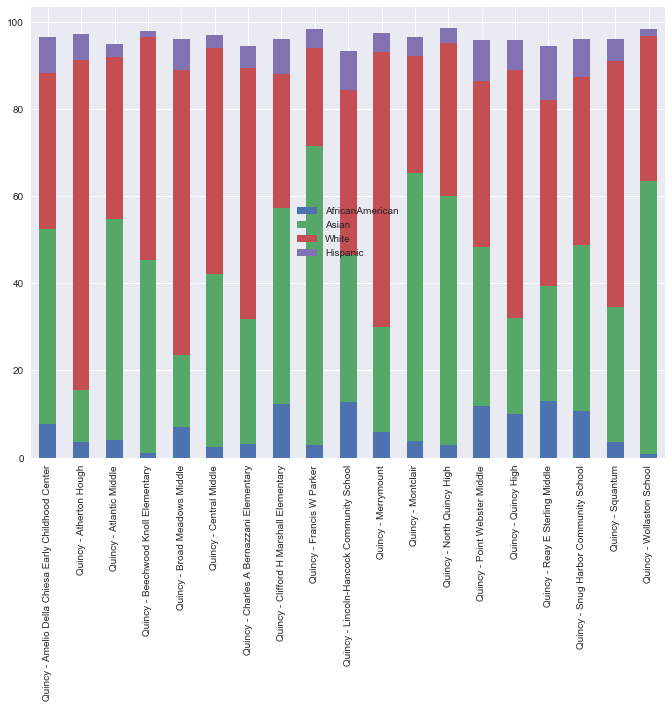

In [26]:
ax = quincy[['AfricanAmerican','Asian','White','Hispanic']].plot.bar(stacked=True, figsize=(len(quincy) *0.5,10))
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("test.png")

In [ ]:
quincy[['APercent', 'PPercent', 'NIPercent', 'W/FPercent']].sort_values('APercent').plot.bar(stacked=True, figsize=(12, 6))

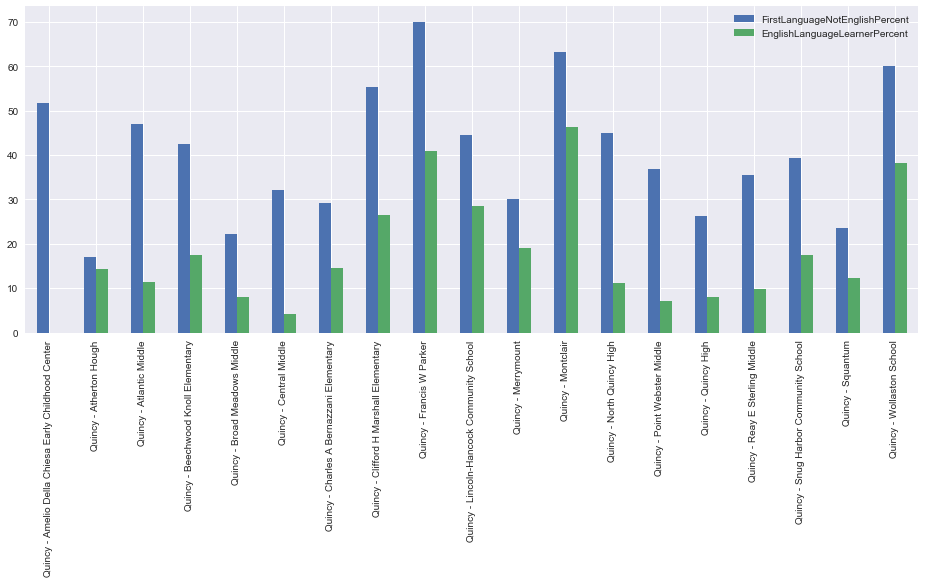

In [17]:
quincy[['FirstLanguageNotEnglishPercent', 
       'EnglishLanguageLearnerPercent', 
       ]].plot.bar(stacked=False, figsize=(16, 6))

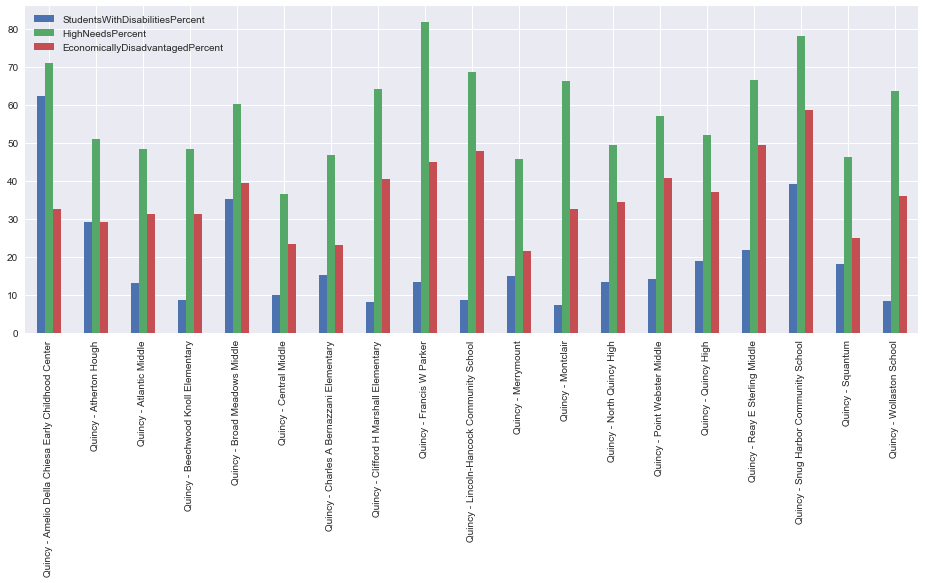

In [18]:
quincy[['StudentsWithDisabilitiesPercent', 'HighNeedsPercent',
        'EconomicallyDisadvantagedPercent']].plot.bar(stacked=False, figsize=(16, 6))
